In [39]:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt

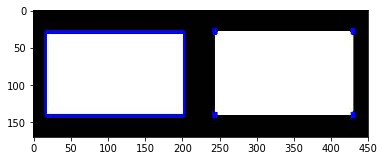

In [60]:
img = cv2.imread("/home/whirldata/Desktop/data.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

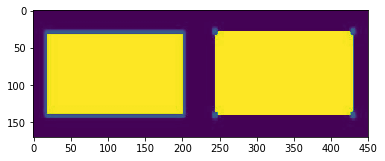

In [61]:
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(imgray)
plt.show()

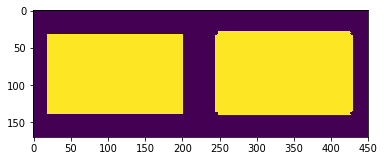

In [62]:
ret,thresh = cv2.threshold(imgray,200,255,0)
plt.imshow(thresh)
plt.show()

In [63]:
image, contours = cv2.findContours(thresh.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [70]:
cnt = contours
img = cv2.drawContours(img, cnt, -1, (0,255,0), 0)

error: OpenCV(4.1.0) /io/opencv/modules/imgproc/src/drawing.cpp:2509: error: (-215:Assertion failed) npoints > 0 in function 'drawContours'


In [55]:
len(contours)

1

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import imutils
import cv2

In [85]:
frame = cv2.imread("/home/whirldata/Desktop/smile.jpeg")

In [86]:
greenLower = (29, 86, 6)
greenUpper = (64, 255, 255)
yellowLower = (20, 100, 100)
yellowUpper = (30,255,255)

In [87]:
frame = imutils.resize(frame, width=600)
blurred = cv2.GaussianBlur(frame, (11, 11), 0)
hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)

In [88]:
mask = cv2.inRange(hsv, yellowLower, yellowUpper)
mask = cv2.erode(mask, None, iterations=2)
mask = cv2.dilate(mask, None, iterations=2)

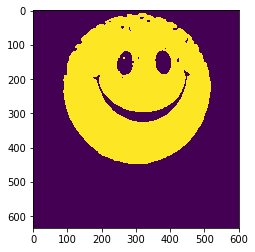

In [89]:
plt.imshow(mask)
plt.show()

In [93]:
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
center = None

In [98]:
if len(cnts) > 0:
    # find the largest contour in the mask, then use
    # it to compute the minimum enclosing circle and
    # centroid
    c = max(cnts, key=cv2.contourArea)
    ((x, y), radius) = cv2.minEnclosingCircle(c)
    x,y,w,h = cv2.boundingRect(c)
    M = cv2.moments(c)
    center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))

    # only proceed if the radius meets a minimum size
    if radius > 10:
        # draw the circle and centroid on the frame,
        # then update the list of tracked points
        cv2.circle(frame, (int(x), int(y)), int(radius),
            (0, 255, 255), 2)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)

        cv2.circle(frame, center, 5, (0, 0, 255), -1)

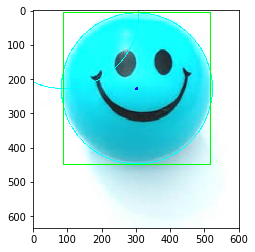

In [99]:
plt.imshow(frame)
plt.show()

In [10]:
M

{'m00': 9463.5,
 'm01': 1112668.0,
 'm02': 138996292.0833333,
 'm03': 18277437914.100002,
 'm10': 3069327.333333333,
 'm11': 361629581.625,
 'm12': 45212692853.15,
 'm20': 1002287936.75,
 'm21': 118321388707.11667,
 'm30': 329507239973.7,
 'mu02': 8174706.177061856,
 'mu03': 12716165.802181244,
 'mu11': 754397.4621286392,
 'mu12': -45816826.5818162,
 'mu20': 6803150.027634263,
 'mu21': -11648700.730992198,
 'mu30': 19001076.651794434,
 'nu02': 0.09127851770956476,
 'nu03': 0.0014595760072855654,
 'nu11': 0.008423578855981512,
 'nu12': -0.005258907586539291,
 'nu20': 0.07596376393572504,
 'nu21': -0.0013370511494974061,
 'nu30': 0.0021809652394431567}

In [11]:
cnts

[array([[[254,  96]],
 
        [[252,  98]],
 
        [[252,  99]],
 
        [[249, 102]],
 
        [[249, 103]],
 
        [[248, 104]],
 
        [[247, 104]],
 
        [[247, 105]],
 
        [[246, 106]],
 
        [[246, 108]],
 
        [[245, 109]],
 
        [[245, 111]],
 
        [[244, 112]],
 
        [[244, 114]],
 
        [[243, 115]],
 
        [[243, 122]],
 
        [[242, 123]],
 
        [[242, 145]],
 
        [[243, 146]],
 
        [[243, 147]],
 
        [[244, 148]],
 
        [[244, 154]],
 
        [[245, 155]],
 
        [[245, 156]],
 
        [[246, 157]],
 
        [[246, 158]],
 
        [[248, 160]],
 
        [[248, 161]],
 
        [[250, 163]],
 
        [[250, 164]],
 
        [[251, 165]],
 
        [[251, 166]],
 
        [[253, 168]],
 
        [[254, 168]],
 
        [[255, 169]],
 
        [[255, 170]],
 
        [[256, 170]],
 
        [[257, 171]],
 
        [[261, 171]],
 
        [[262, 172]],
 
        [[263, 172]],
 
        [[264, 1